In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import os

In [2]:
df = pd.read_csv('../data/voice_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,label,emotions
0,-573.379150,34.064041,-33.337578,3.489916,-13.482152,-6.327230,-17.734171,-15.280941,-8.379515,-0.323866,...,-0.323118,-0.797864,-0.332338,0.177740,0.204333,-0.211895,0.080943,-0.274973,6,fearful
1,-545.244568,38.073475,-8.023163,7.236882,-13.688817,-2.157916,-12.315373,-7.948586,-14.858138,1.719064,...,0.066087,0.029629,-0.052548,-0.059842,-0.084479,0.181888,0.202147,-0.165808,5,angry
2,-690.535461,43.141396,-9.854416,10.819540,-14.295117,-2.288000,-10.151420,-4.941710,-6.615477,-2.972474,...,0.057103,-0.174446,-0.116118,0.133232,0.191797,-0.322106,-0.287355,0.132173,8,surprise
3,-553.611633,41.233486,-9.912664,8.587062,-5.737630,-5.831647,-17.839375,-11.084945,-11.369494,3.470583,...,0.015315,0.068387,0.201094,-0.062219,-0.291406,-0.284542,0.070689,0.088308,6,fearful
4,-576.153442,49.947994,-13.857949,8.248825,-12.159565,0.193612,-8.719680,-7.731155,-8.692744,0.833810,...,-0.276208,-0.723615,0.074101,0.027505,0.288559,-0.022368,0.053056,0.346106,5,angry


In [3]:
df.drop(inplace=True, columns=["label"])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,emotions
0,-573.379150,34.064041,-33.337578,3.489916,-13.482152,-6.327230,-17.734171,-15.280941,-8.379515,-0.323866,...,0.428459,-0.323118,-0.797864,-0.332338,0.177740,0.204333,-0.211895,0.080943,-0.274973,fearful
1,-545.244568,38.073475,-8.023163,7.236882,-13.688817,-2.157916,-12.315373,-7.948586,-14.858138,1.719064,...,-0.031505,0.066087,0.029629,-0.052548,-0.059842,-0.084479,0.181888,0.202147,-0.165808,angry
2,-690.535461,43.141396,-9.854416,10.819540,-14.295117,-2.288000,-10.151420,-4.941710,-6.615477,-2.972474,...,0.236663,0.057103,-0.174446,-0.116118,0.133232,0.191797,-0.322106,-0.287355,0.132173,surprise
3,-553.611633,41.233486,-9.912664,8.587062,-5.737630,-5.831647,-17.839375,-11.084945,-11.369494,3.470583,...,-0.129597,0.015315,0.068387,0.201094,-0.062219,-0.291406,-0.284542,0.070689,0.088308,fearful
4,-576.153442,49.947994,-13.857949,8.248825,-12.159565,0.193612,-8.719680,-7.731155,-8.692744,0.833810,...,0.525122,-0.276208,-0.723615,0.074101,0.027505,0.288559,-0.022368,0.053056,0.346106,angry


In [4]:
target = df["emotions"]


In [5]:
data = df.drop("emotions", axis=1)
feature_names = data.columns
data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-573.379150,34.064041,-33.337578,3.489916,-13.482152,-6.327230,-17.734171,-15.280941,-8.379515,-0.323866,...,-0.334692,0.428459,-0.323118,-0.797864,-0.332338,0.177740,0.204333,-0.211895,0.080943,-0.274973
1,-545.244568,38.073475,-8.023163,7.236882,-13.688817,-2.157916,-12.315373,-7.948586,-14.858138,1.719064,...,-0.079512,-0.031505,0.066087,0.029629,-0.052548,-0.059842,-0.084479,0.181888,0.202147,-0.165808
2,-690.535461,43.141396,-9.854416,10.819540,-14.295117,-2.288000,-10.151420,-4.941710,-6.615477,-2.972474,...,-0.045710,0.236663,0.057103,-0.174446,-0.116118,0.133232,0.191797,-0.322106,-0.287355,0.132173
3,-553.611633,41.233486,-9.912664,8.587062,-5.737630,-5.831647,-17.839375,-11.084945,-11.369494,3.470583,...,-0.175183,-0.129597,0.015315,0.068387,0.201094,-0.062219,-0.291406,-0.284542,0.070689,0.088308
4,-576.153442,49.947994,-13.857949,8.248825,-12.159565,0.193612,-8.719680,-7.731155,-8.692744,0.833810,...,-0.403427,0.525122,-0.276208,-0.723615,0.074101,0.027505,0.288559,-0.022368,0.053056,0.346106


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [7]:
from joblib import load

X_scaler = load('scaler.sav')


In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.858
k: 3, Train/Test Score: 0.936/0.851
k: 5, Train/Test Score: 0.916/0.839
k: 7, Train/Test Score: 0.895/0.834
k: 9, Train/Test Score: 0.878/0.820
k: 11, Train/Test Score: 0.866/0.805
k: 13, Train/Test Score: 0.849/0.792
k: 15, Train/Test Score: 0.845/0.787
k: 17, Train/Test Score: 0.837/0.773
k: 19, Train/Test Score: 0.831/0.778
k: 21, Train/Test Score: 0.826/0.776
k: 23, Train/Test Score: 0.816/0.772
k: 25, Train/Test Score: 0.810/0.770
k: 27, Train/Test Score: 0.803/0.759
k: 29, Train/Test Score: 0.800/0.764


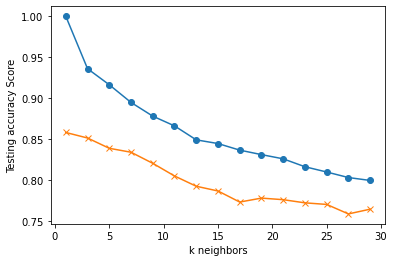

In [9]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_scaled, y_train)
print('k=25 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=25 Test Acc: 0.770


In [11]:
from sklearn.metrics import classification_report
predictions = knn.predict(X_test_scaled)
print(classification_report(y_test, predictions,))

              precision    recall  f1-score   support

       angry       0.62      0.83      0.71       145
        calm       0.89      0.77      0.83       139
     disgust       0.68      0.85      0.75       141
     fearful       0.92      0.68      0.78       164
       happy       0.89      0.70      0.79       144
         sad       0.92      0.59      0.72       142
    surprise       0.65      0.89      0.75       161

    accuracy                           0.76      1036
   macro avg       0.80      0.76      0.76      1036
weighted avg       0.80      0.76      0.76      1036



In [14]:
import joblib
filename = 'knn_model.sav'
joblib.dump(knn, filename)

['knn_model.sav']